In [3]:
import imageio as io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from skimage.transform import rotate

In [4]:
min_cells,max_cells=70,310

In [31]:
pad=10
xx,yy=np.meshgrid(np.arange(256+2*pad),np.arange(256+2*pad))
#border pad
fringe=np.pad(np.zeros((256,256)),((pad,pad),(pad,pad)),mode='constant',constant_values=1)
fringe=fringe.astype(bool)

def make_area_summation_synthetic_vgg():
    n_cell=np.random.randint(min_cells,max_cells)
    x,y=np.random.rand(2,n_cell)*255+pad
    image=np.zeros((256+2*pad,256+2*pad,3))
    image[:,:,2]=np.clip(np.random.normal(loc=0.2,scale=0.1,size=(256+2*pad,256+2*pad)),0,1) #blue channel noise for bg
    image[fringe,2]=np.clip(np.random.normal(loc=0.3,scale=0.06,size=(256+2*pad,256+2*pad)),0,1)[fringe]
    for i in range(n_cell):
        mask=(xx-x[i])**2+(yy-y[i])**2<(np.random.rand()*1+5)**2
        #image[mask,2]=np.random.rand(256,256)[mask]*0.3+0.7
        image[mask,0]+=np.ones((256+2*pad,256+2*pad))[mask]
    alone=image[:,:,0]==1
    double=image[:,:,0]==2
    triple=image[:,:,0]==3
    quadruple_more=image[:,:,0]>=4
    #convert to [0-1] values, and distinct colors
    image[alone,:]=[1,0,0] 
    image[double,:]=[0,1,0]
    image[triple,:]=[1,1,0]
    image[quadruple_more,:]=[0.3,0.7,0]
    image[image[:,:,2]==0,2]=np.random.rand(256+2*pad,256+2*pad)[image[:,:,2]==0]*0.3+0.7
    return image

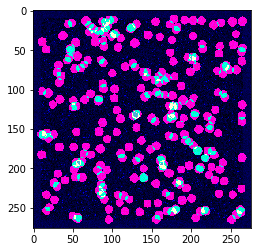

In [36]:
plt.imshow(make_area_summation_synthetic_vgg())

In [37]:
N_images=500
dataname='VGG_area'
train_name='trainA'
directory='../Data/'+dataname+'/'+train_name+'/'
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
for i in range(N_images):
    name=directory+str(i).zfill(5)+'.png'
    image=make_area_summation_synthetic_vgg()
    io.imsave(name,image)
    if i%50==0:
        print i,

/usr/local/lib/python2.7/dist-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


0 50 100 150 200